# **Trip Duration EDA**
   **Author**:Sherine Tarek
  ## **Table of Contents**:
  - Import Libraries
  - Explore Dataset
      - Check Null Values
      - Check Duplicated Values
      - Summary Statistics
  - Distribution of Every Features
      - Categorical Features
      - Numerical Features
      - Check Outliers
  - Analysis Features and Feature Engineering
      - Target Distribution
      - Numerical Features VS Target
      - Categorical Features VS Target
      - Time Analysis
      - Geographical Analysis
  - Correlation Matrix
  


# Import Libraries

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
import seaborn as sns
from geopy import distance
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Explore Dataset

In [2]:
df1=pd.read_csv("F:\\Machine_Learning\\projects\\Trip_duration_predict\\Datasets\\train.csv")
df2=pd.read_csv("F:\\Machine_Learning\\projects\\Trip_duration_predict\\Datasets\\Val.csv")
df=pd.concat([df1,df2])
df.reset_index(drop=True,inplace=True)

In [3]:
df1.shape,df2.shape

((1000000, 11), (229319, 11))

In [4]:
df.shape


(1229319, 11)

Explore Dataset

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1229319 non-null  object 
 1   vendor_id           1229319 non-null  int64  
 2   pickup_datetime     1229319 non-null  object 
 3   dropoff_datetime    1229319 non-null  object 
 4   passenger_count     1229319 non-null  int64  
 5   pickup_longitude    1229319 non-null  float64
 6   pickup_latitude     1229319 non-null  float64
 7   dropoff_longitude   1229319 non-null  float64
 8   dropoff_latitude    1229319 non-null  float64
 9   store_and_fwd_flag  1229319 non-null  object 
 10  trip_duration       1229319 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 103.2+ MB


## Modify ID Column

In [7]:
df["id"]=df["id"].str.replace("id","",regex=False)
df["id"]

0          2793718
1          3485529
2          1816614
3          1050851
4          0140657
            ...   
1229314    3691639
1229315    1528272
1229316    3562069
1229317    0402200
1229318    3770970
Name: id, Length: 1229319, dtype: object

In [8]:
df["id"]=df["id"].astype("int64")
df["id"]

0          2793718
1          3485529
2          1816614
3          1050851
4           140657
            ...   
1229314    3691639
1229315    1528272
1229316    3562069
1229317     402200
1229318    3770970
Name: id, Length: 1229319, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1229319 non-null  int64  
 1   vendor_id           1229319 non-null  int64  
 2   pickup_datetime     1229319 non-null  object 
 3   dropoff_datetime    1229319 non-null  object 
 4   passenger_count     1229319 non-null  int64  
 5   pickup_longitude    1229319 non-null  float64
 6   pickup_latitude     1229319 non-null  float64
 7   dropoff_longitude   1229319 non-null  float64
 8   dropoff_latitude    1229319 non-null  float64
 9   store_and_fwd_flag  1229319 non-null  object 
 10  trip_duration       1229319 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 103.2+ MB


# Check Null Values

In [10]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Check Duplicated Values

In [11]:
df.duplicated().sum()

0

# Summary Statistics

In [15]:
df.describe(include="all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.229319e+06,1.229319e+06,1229319,1229319,1.229319e+06,1.229319e+06,1.229319e+06,1.229319e+06,1.229319e+06,1229319,1.229319e+06
unique,NaN,NaN,1173138,1173318,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,2016-05-07 13:18:07,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1222501,NaN
mean,1.998584e+06,1.534912e+00,NaN,NaN,1.664531e+00,-7.397345e+01,4.075093e+01,-7.397340e+01,4.075182e+01,NaN,9.596917e+02
std,1.154733e+06,4.987798e-01,NaN,NaN,1.314509e+00,6.178003e-02,3.354454e-02,6.164072e-02,3.634104e-02,NaN,5.263573e+03
min,1.000000e+00,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,9.984685e+05,1.000000e+00,NaN,NaN,1.000000e+00,-7.399185e+01,4.073737e+01,-7.399133e+01,4.073590e+01,NaN,3.970000e+02
50%,1.997238e+06,2.000000e+00,NaN,NaN,1.000000e+00,-7.398173e+01,4.075411e+01,-7.397976e+01,4.075453e+01,NaN,6.620000e+02
75%,2.999010e+06,2.000000e+00,NaN,NaN,2.000000e+00,-7.396735e+01,4.076836e+01,-7.396303e+01,4.076982e+01,NaN,1.075000e+03


- From the describtion of the Dataset :
    - number of Vendor_ID: 2
    - The maximun number of passengers are 8 passengers [seems Challenging  for Taxi]
    - The minimum number of passengers is 0 ,something strange!?
    - The maximum Trip duration is 3.526282e+06 in sec which is  approximately 40 days which is definitly outlier

# Distrbution of Numerical  Features

In [16]:
##vendorID
d=df["vendor_id"].value_counts()
d

vendor_id
2    657578
1    571741
Name: count, dtype: int64

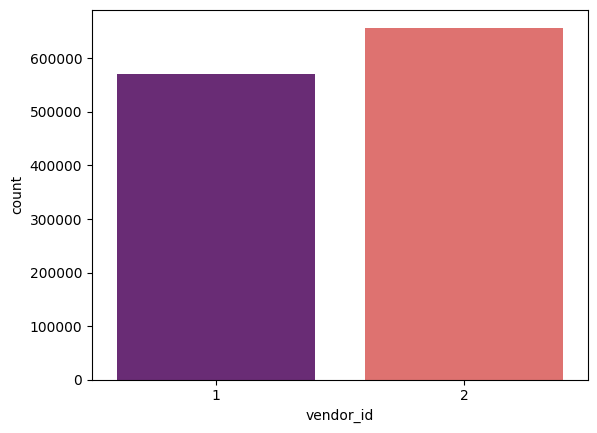

In [17]:
sns.countplot(x="vendor_id",data=df,palette="magma")
plt.show()


- Alot of Trips have done by Vendor number 2 
- may be it has more facilities for clients [need more investigation]

In [18]:
##passenger_count
d=df["passenger_count"].value_counts()
d_sort=d.sort_values()
d_sort

passenger_count
8         1
7         3
0        51
4     23932
6     40790
3     50470
5     65797
2    177073
1    871202
Name: count, dtype: int64

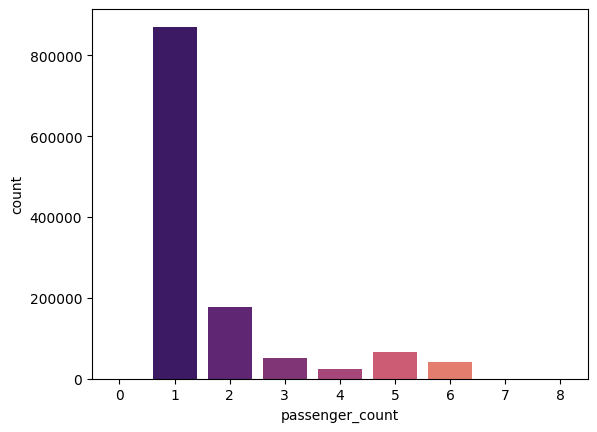

In [19]:
sns.countplot(x="passenger_count",data=df,palette="magma")
plt.show()

- It seems that most trips were made by only one passenger

In [20]:
##datetime of pickup
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])



In [21]:
#datetime of dropoff
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])


# Categorical Features

In [22]:
#store_and_fwd_flag
print("number of unique values ",df["store_and_fwd_flag"].nunique())
print("frequency of every value",df["store_and_fwd_flag"].value_counts())



number of unique values  2
frequency of every value store_and_fwd_flag
N    1222501
Y       6818
Name: count, dtype: int64


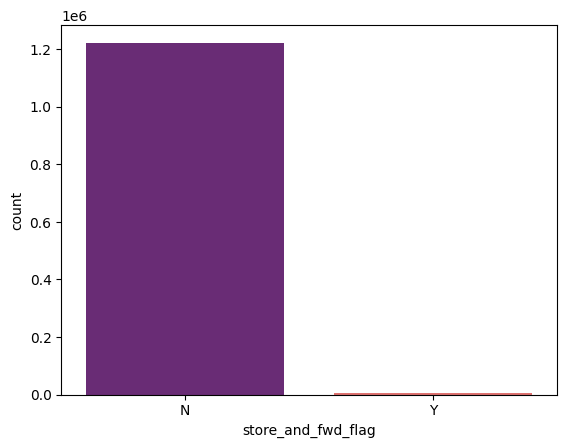

In [23]:
sns.countplot(x=df["store_and_fwd_flag"],data=df,palette="magma")
plt.show()

- Unbalanced Feature.May cause a bias in the ml model 
- Most of Trips didn't store and  forward to vendor

 # Check Outliers

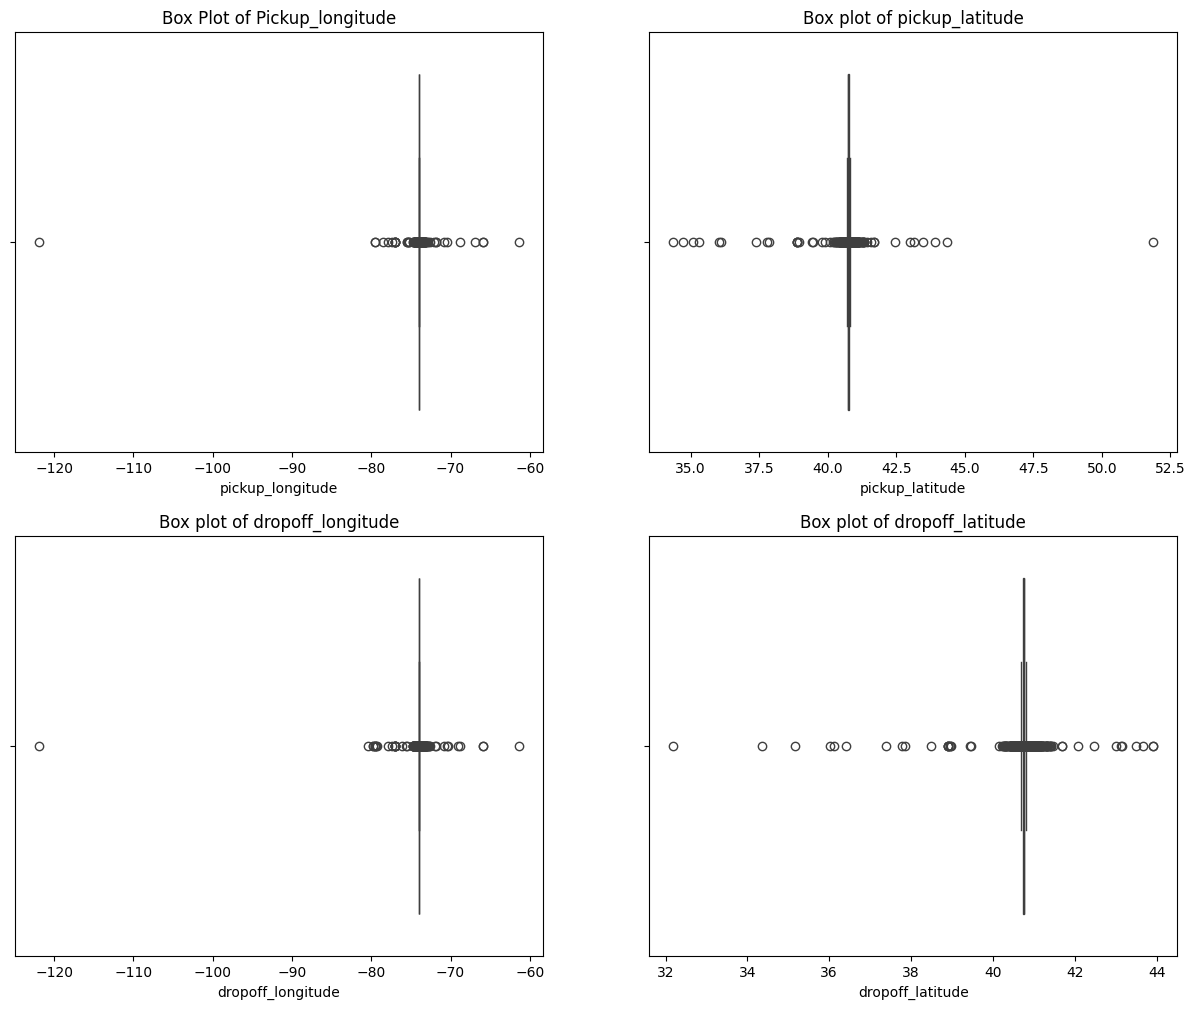

In [31]:
#let's see if there is outliers in pickuplongitude ,latitude
fig,ax=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(data=df,x="pickup_longitude",orient='v',ax=ax[0,0])
ax[0,0].set_title("Box Plot of Pickup_longitude")


sns.boxplot(data=df,x="pickup_latitude",orient='v',ax=ax[0,1])
ax[0,1].set_title("Box plot of pickup_latitude")

sns.boxplot(data=df,x="dropoff_longitude",orient='v',ax=ax[1,0])
ax[1,0].set_title("Box plot of dropoff_longitude")

sns.boxplot(data=df,x="dropoff_latitude",orient='v',ax=ax[1,1])
ax[1,1].set_title("Box plot of dropoff_latitude")





plt.show()


- In longitude and latitude Features there are alot of outliers need to handel [Standardization  or IGR]

In [32]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827


# Target distribution
## Trip Duration


In [45]:
df["log_trip_duration"]=np.log1p(df["trip_duration"])
#applied log transformation on  np.log1p() computes the natural logarithm of (1 + x), which helps avoid issues with zero values.

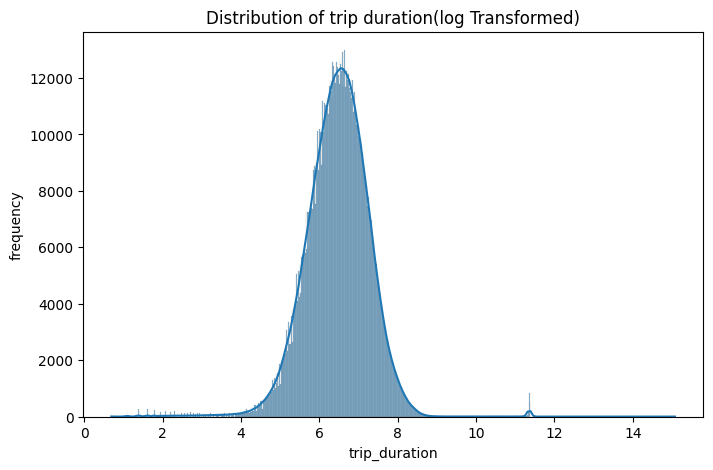

In [46]:
fig=plt.figure(figsize=(8,5))
sns.histplot(df["log_trip_duration"],kde=True,palette="magma")
plt.title("Distribution of trip duration(log Transformed)")
plt.xlabel("trip_duration")
plt.ylabel("frequency")
plt.show()

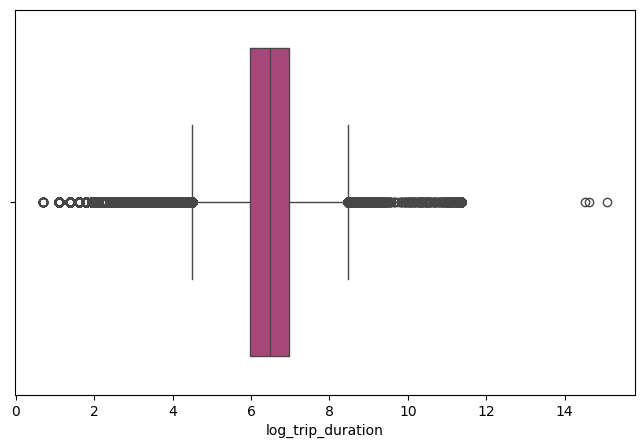

In [47]:
fig=plt.figure(figsize=(8,5))
sns.boxplot(x=df["log_trip_duration"],data=df,palette="magma")
plt.show()

from the above 2 plots:
- There is a peak in the right side of the distribution :which is an outlier here So we need to deal with it 
- The majority of the trip duration is around 5 which means the most of trip are around 150 to 1000 second

In [48]:
df.drop(columns="id",axis=1,inplace=True)

In [49]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,6.947937
1,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827,6.719013
2,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614,6.421622
3,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867,6.766192
4,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,8.510773


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1229319 non-null  int64         
 1   pickup_datetime     1229319 non-null  datetime64[ns]
 2   dropoff_datetime    1229319 non-null  datetime64[ns]
 3   passenger_count     1229319 non-null  int64         
 4   pickup_longitude    1229319 non-null  float64       
 5   pickup_latitude     1229319 non-null  float64       
 6   dropoff_longitude   1229319 non-null  float64       
 7   dropoff_latitude    1229319 non-null  float64       
 8   store_and_fwd_flag  1229319 non-null  object        
 9   trip_duration       1229319 non-null  int64         
 10  log_trip_duration   1229319 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 103.2+ MB


# Target VS Numerical Features

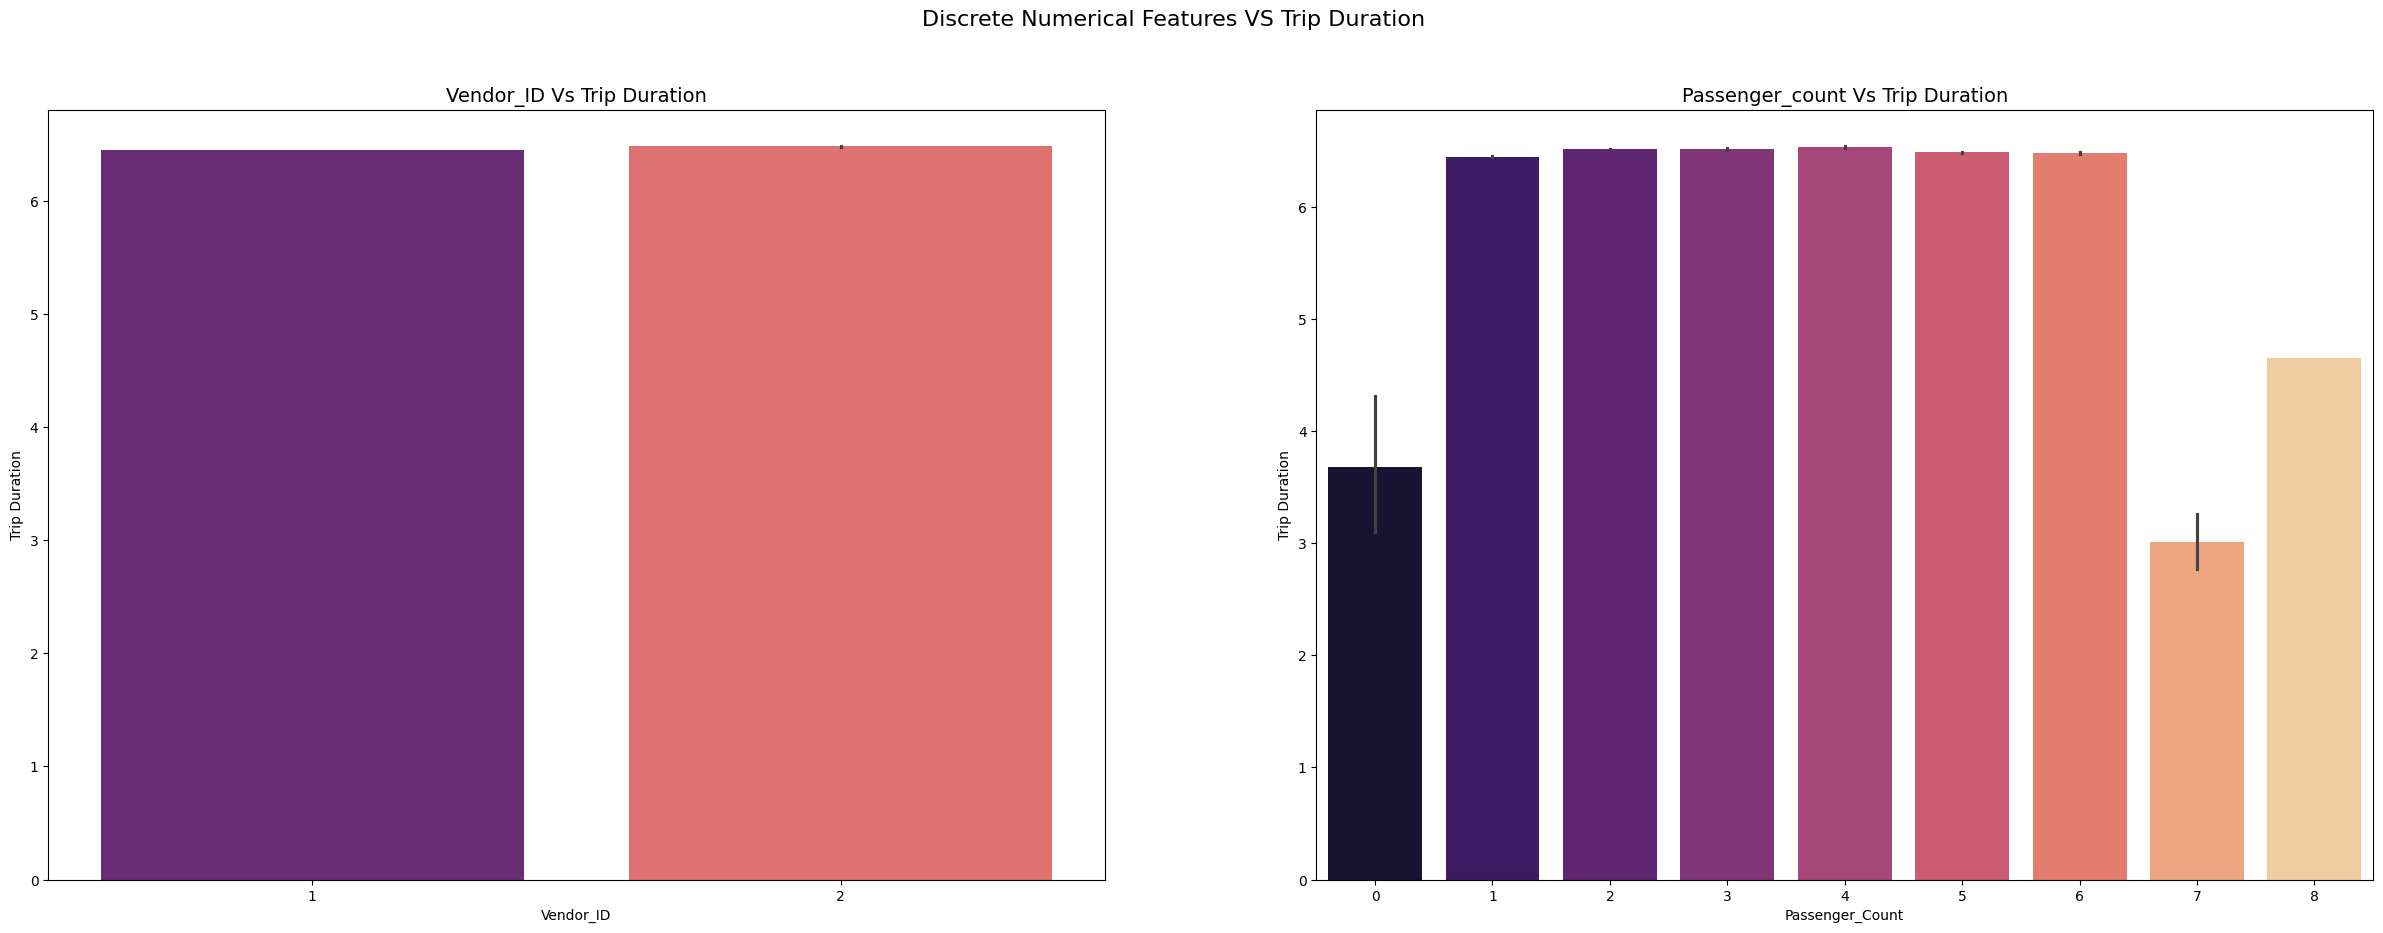

In [51]:
dis=["vendor_id","passenger_count"]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,10))
sns.barplot(data=df,x="vendor_id",y="log_trip_duration",palette="magma",ax=ax1)
ax1.set_title("Vendor_ID Vs Trip Duration",fontsize=14)
ax1.set_ylabel("Trip Duration")
ax1.set_xlabel("Vendor_ID")

sns.barplot(data=df,x="passenger_count",y="log_trip_duration",palette="magma",ax=ax2)
ax2.set_title("Passenger_count Vs Trip Duration",fontsize=14)
ax2.set_ylabel("Trip Duration")
ax2.set_xlabel("Passenger_Count")

fig.suptitle("Discrete Numerical Features VS Trip Duration",fontsize=16)
plt.show()


- Trip duration in both Vendors is almost the same 
- Trip duration for passengers[1-6] is almost the same but it decreases from 7 to 8 passengers
- There are Trips have made by no passenger 

# Target VS Categorial Features

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

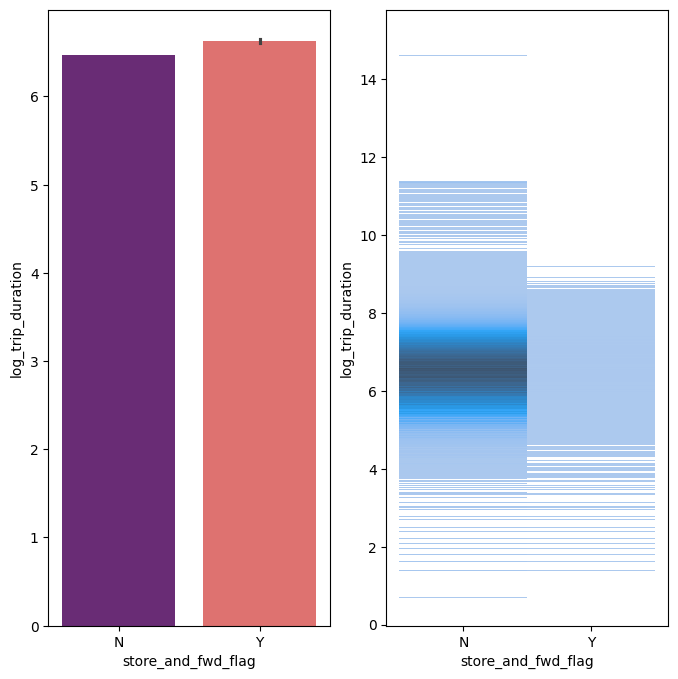

In [31]:
#there is only categorial feature store_and_fwd_flag
#let's find its frequency
df["store_and_fwd_flag"].value_counts()
#its relationship with target 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,8))
sns.barplot(data=df,y="log_trip_duration",x="store_and_fwd_flag",palette="magma",ax=ax1)
#le't find hist
sns.histplot(data=df,x="store_and_fwd_flag",y="log_trip_duration",palette="magma",ax=ax2)



- Most of Trip Not stored or forward to the vendor

# Time analysis

In [32]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,6.947937
1,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827,6.719013
2,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614,6.421622
3,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867,6.766192
4,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,8.510773


In [38]:
#pickup time analysis
df_date_time=pd.DataFrame()
df_date_time["pickup_month"]=df["pickup_datetime"].dt.month
df_date_time["pickup_day"]=df["pickup_datetime"].dt.day
df_date_time["pickup_hour"]=df["pickup_datetime"].dt.hour
df_date_time["log_trip_duration"]=df["log_trip_duration"]
df_date_time["pickup_quarter"]=df["pickup_datetime"].dt.quarter #every 3 months are a quarter 


In [39]:
df_date_time.head()

,pickup_month,pickup_day,pickup_hour,log_trip_duration,pickup_quarter
0,6,8,7,6.947937,2
1,4,3,12,6.719013,2
2,6,5,2,6.421622,2
3,5,5,17,6.766192,2
4,5,12,17,8.510773,2


In [40]:
def hour_to_period(hour):
    if    12<=hour <=17:
        return "afternoon"
    elif 5<=hour<12:
        return "morning"
    else:
        return "Night"

In [41]:
df_date_time["pickup_period"]=df_date_time["pickup_hour"].apply(hour_to_period)
df_date_time.head()

,pickup_month,pickup_day,pickup_hour,log_trip_duration,pickup_quarter,pickup_period
0,6,8,7,6.947937,2,morning
1,4,3,12,6.719013,2,afternoon
2,6,5,2,6.421622,2,Night
3,5,5,17,6.766192,2,afternoon
4,5,12,17,8.510773,2,afternoon


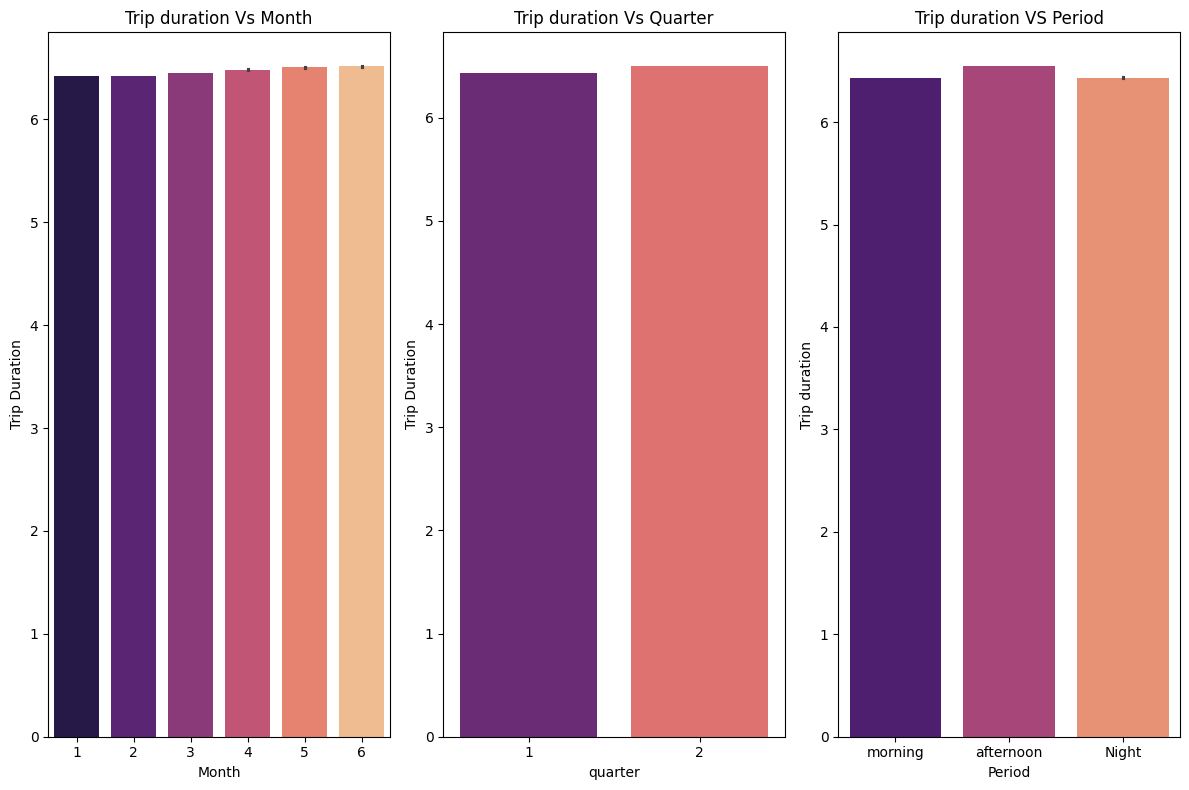

In [42]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))

sns.barplot(data=df_date_time,x="pickup_month",y="log_trip_duration",palette="magma",ax=ax1)
ax1.set_title("Trip duration Vs Month")
ax1.set_ylabel("Trip Duration")
ax1.set_xlabel("Month")

sns.barplot(data=df_date_time,x="pickup_quarter",y="log_trip_duration",palette="magma",ax=ax2)
ax2.set_title("Trip duration Vs Quarter")
ax2.set_ylabel("Trip Duration")
ax2.set_xlabel("quarter")

sns.barplot(data=df_date_time,x="pickup_period",y="log_trip_duration",palette="magma",ax=ax3)
ax3.set_title("Trip duration VS Period")
ax3.set_ylabel("Trip duration")
ax3.set_xlabel("Period")
plt.tight_layout()
plt.show()


- Longer Trip Duration in April ,may and june 
- Longer trip durations in the afternoon may be due to traffic jams.

# Feature Engineering

In [43]:
df.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,6.947937
1,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827,6.719013


In [62]:
Geo_df = pd.DataFrame()

def haversine_distance(df):
    pick = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    dist = distance.geodesic(pick, drop).km
    return dist

Geo_df['haversine_distance'] = df.apply(haversine_distance, axis=1) # get the totall distance from Latitude and longitude coordinates

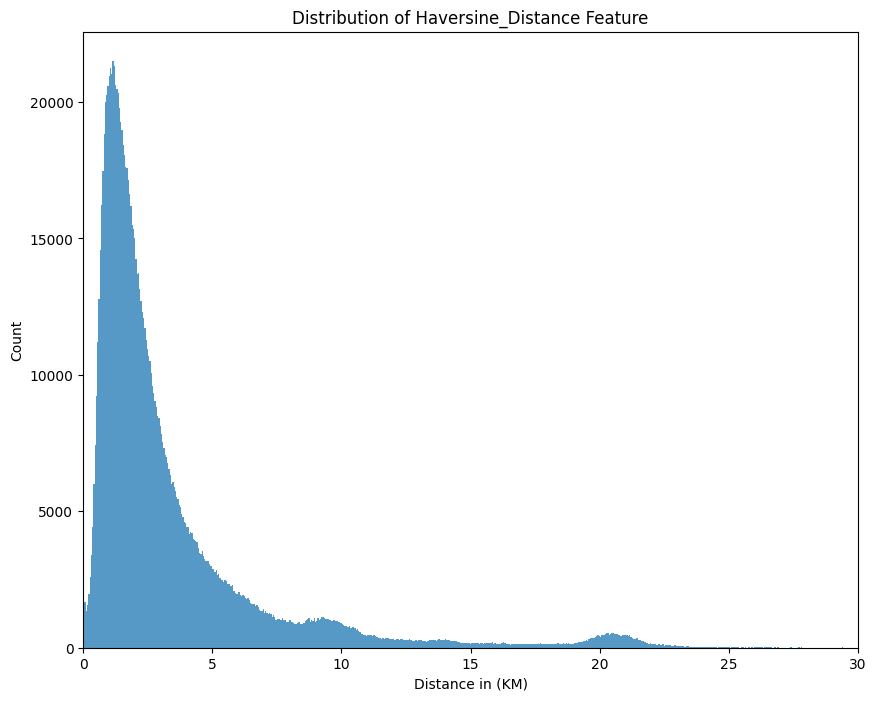

In [63]:
#histogram for distance distribution

fig,ax=plt.subplots(1,1,figsize=(10,8))
sns.histplot(data=Geo_df,x=Geo_df["haversine_distance"],ax=ax)
plt.xlim(0,30)
ax.set_title("Distribution of Haversine_Distance Feature")
ax.set_xlabel("Distance in (KM)")
plt.show()
             

- Most of Trip goes from 1KM to 5 km
- There are few trips go for more than 25Km
- The distribution is right sided so may we need to apply log transformation to make it more normal distribuion

In [64]:

Geo_df["log_haversine_distance"]=np.log1p(Geo_df["haversine_distance"])


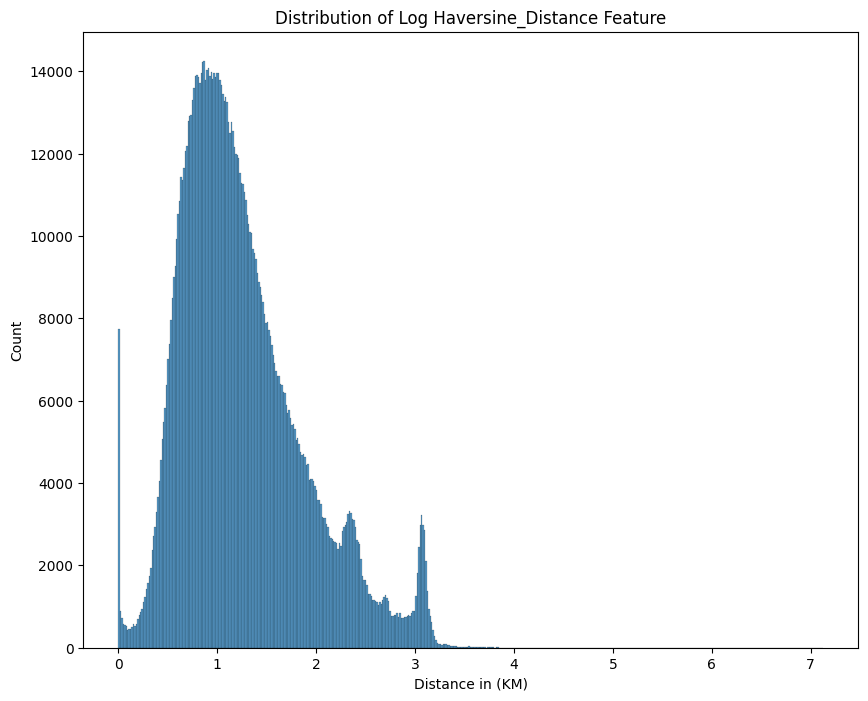

In [66]:
#after applied log transformation becasue of it is right skewed
fig,ax=plt.subplots(1,1,figsize=(10,8))
sns.histplot(data=Geo_df,x=Geo_df["log_haversine_distance"],ax=ax)
#plt.xlim(0,30)
ax.set_title("Distribution of Log Haversine_Distance Feature")
ax.set_xlabel("Distance in (KM)")
plt.show()

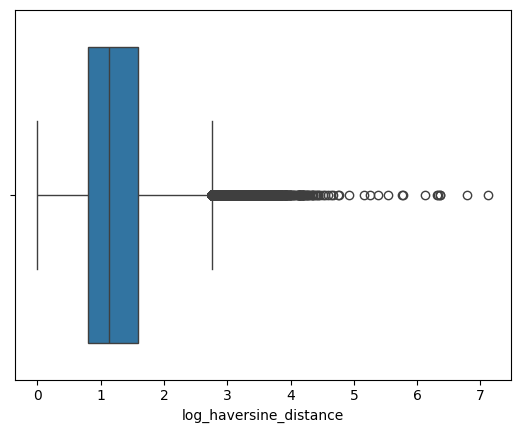

In [67]:
sns.boxplot(data=Geo_df,x="log_haversine_distance",orient='v')
plt.show()

- There are  outliers here may apply Standardization or IGR

In [80]:
def manhattan_distance(df):
    lat_dis=abs(df["pickup_latitude"]-df["dropoff_latitude"])*111.0 
    lat_mean=np.radians((df["pickup_latitude"]+df["dropoff_latitude"])/2.0)
    
    long_dis=abs(df["pickup_longitude"]-df["dropoff_longitude"])*111.0*np.cos(lat_mean)
    return lat_dis+long_dis


Geo_df["manhattan_distance"]=df.apply(manhattan_distance,axis=1)

In [85]:
Geo_df.head()

,haversine_distance,log_haversine_distance,manhattan_distance
0,2.759702,1.324340,3.166208
1,1.959062,1.084872,2.720951
2,1.407727,0.878683,1.796092
3,1.976073,1.090605,2.052537
4,20.861805,3.084741,29.124966


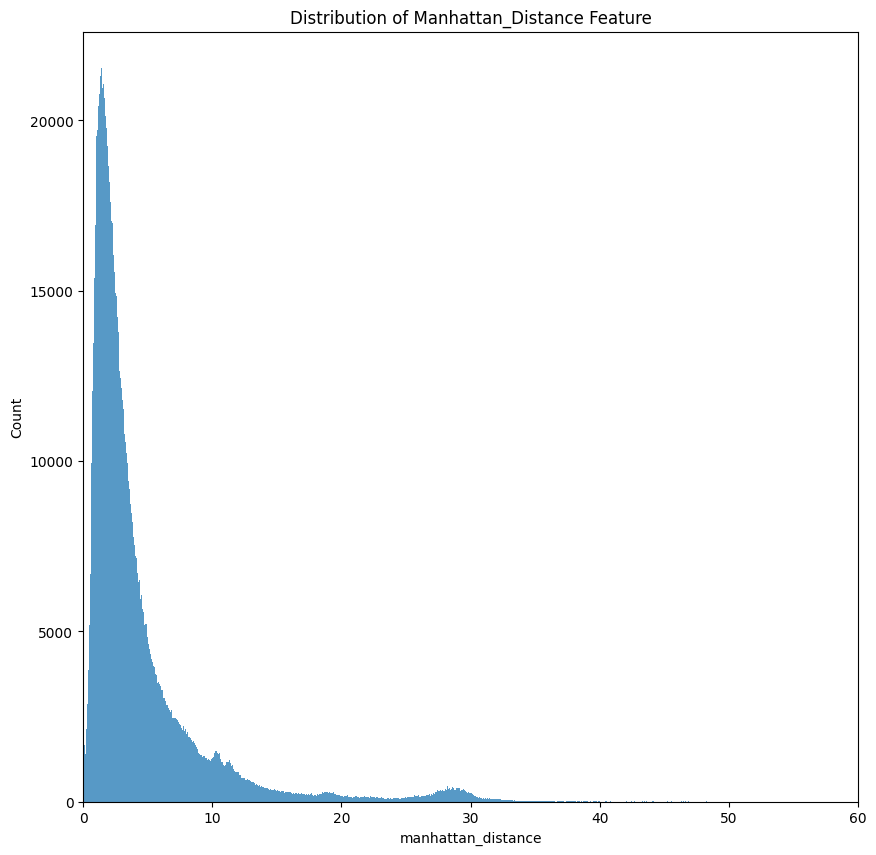

In [89]:
plt.figure(figsize=(10,10))
sns.histplot(data=Geo_df,x="manhattan_distance")
plt.xlim(0,60)
plt.title("Distribution of Manhattan_Distance Feature")
plt.show()


- the Manhattan distance is skwed to the right so we can apply log transformation to return it to normal distribution

In [92]:
Geo_df["log_manhattan_distance"]=np.log1p(Geo_df["manhattan_distance"])

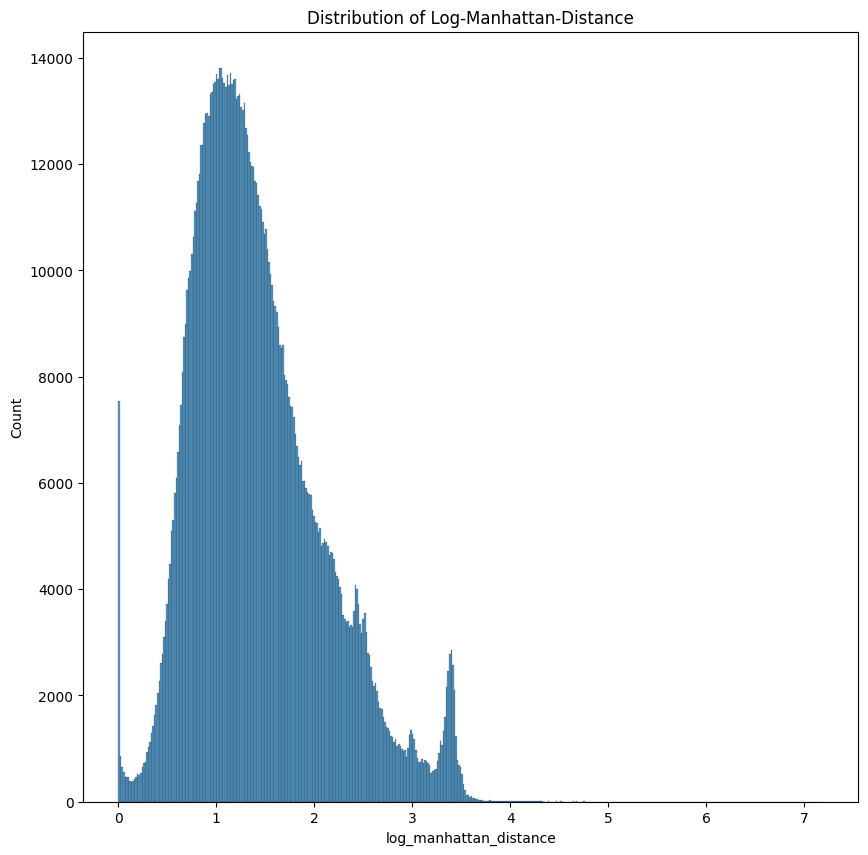

In [94]:
plt.figure(figsize=(10,10))
sns.histplot(data=Geo_df,x="log_manhattan_distance")
plt.title("Distribution of Log-Manhattan-Distance")
plt.show()

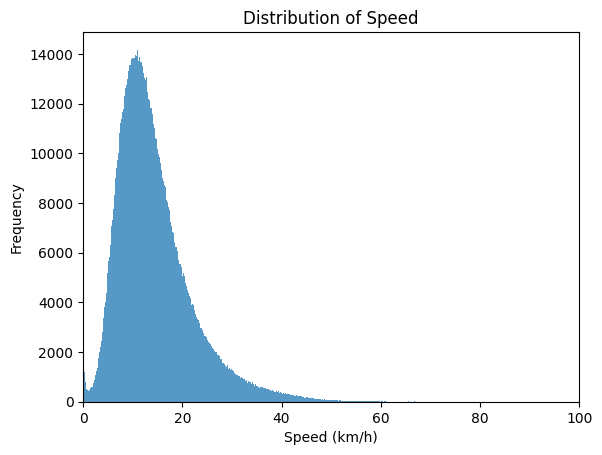

In [47]:
#let's find speed feature
Geo_df['speed_kmh']= Geo_df['distance']/(df['trip_duration']/(60*60)) # Speed = distance / time

# Create the histogram plot
sns.histplot(Geo_df['speed_kmh'])
# Set the x-axis limit to the desired range
plt.xlim(0, 100)
# Add labels and title (optional)
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Speed')
plt.show()

- Most of Trip goes in speed of 1-40 KM/h

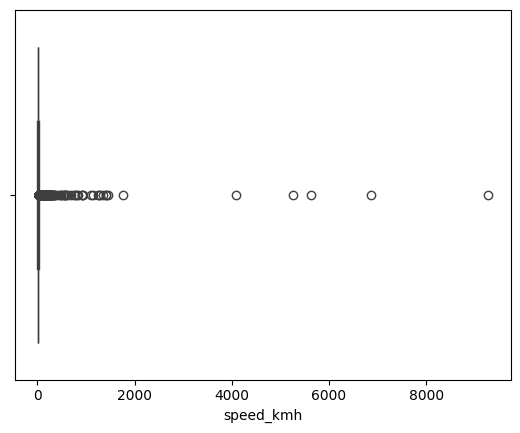

In [57]:
sns.boxplot(data=Geo_df,x="speed_kmh",orient='v')
plt.show()

- There are some outliers.need to deal with them

In [82]:
Geo_df["log_trip_duration"]=df["log_trip_duration"]
Geo_df

,distance,speed_kmh,log_trip_duration
0,2.759702,9.552813,6.947937
1,1.959062,8.527959,6.719013
2,1.407727,8.253772,6.421622
3,1.976073,8.205149,6.766192
4,20.861805,15.120294,8.510773
...,...,...,...
1229314,3.122712,11.589447,6.878326
1229315,6.076977,23.298314,6.845880
1229316,2.201774,16.309434,6.188264
1229317,1.334510,17.859616,5.598422


# Correlation Matrix

In [76]:
corr=df.drop(columns=["pickup_datetime","dropoff_datetime","store_and_fwd_flag"],inplace=False).corr()

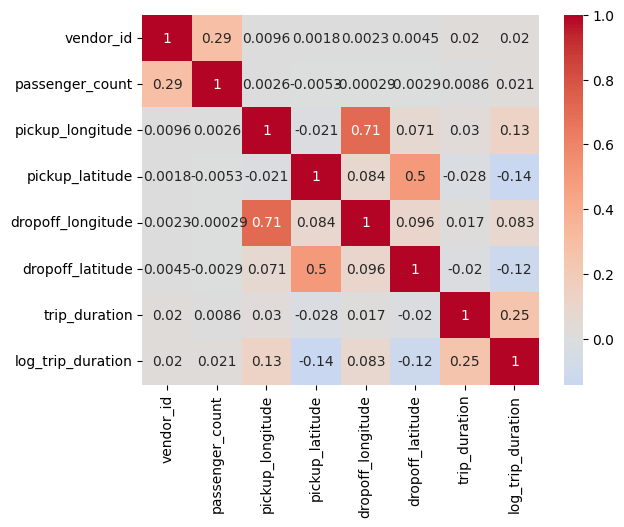

In [79]:
sns.heatmap(corr,annot=True,cmap='coolwarm',center=0)
plt.show()

- There is a positive relationship between Trip duration(Target and pickup_longitude,droppoff_longitude)
- There is a negative relationship between Trip duration (Target and pickup_latitude,droppoff_latitude)


<Axes: >

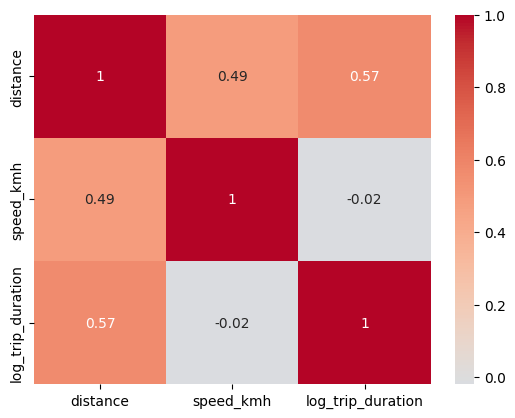

In [84]:
corr=Geo_df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",center=0)

- There is a strong positive relationship between distance and log_trip_duration 
- There is negative relationship between speed and log_trip_duration